
# **Artificial Intelligence  FEUP**
## **2nd Assignment - Supervised Learning**
### **3rd Year - 2nd Semester - 2024/2025**



# Import Libraries and Set Options

Import necessary libraries for data handling, visualization, and machine learning.  
Set pandas display options and seaborn plot style for better readability.

- **pandas** for loading CSV files and handling structured data efficiently.
- **NumPy** for fast numerical operations and array manipulations.
- **matplotlib** and **seaborn** to visualize data and uncover patterns through charts and plots.
- **scikit-learn** for machine learning tasks like splitting datasets, scaling features, training models, and measuring their performance with built-in metrics.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import VarianceThreshold, f_classif
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import time


sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

# Load and Preview Dataset

Load the dataset from a CSV file and take a quick look at the first few rows.  
Also, check the shape, data types, and basic statistics of the dataset.

In [77]:
df = pd.read_csv('./original/train.csv')
df.head()  # Preview dataset

print(f"Dataset shape: {df.shape}")
df.info()
df.describe()

Dataset shape: (159256, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  in

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,98.352552,195.796165,127.616046,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,15.329740,28.396959,66.188989,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,46.000000,77.000000,8.000000,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,90.000000,175.000000,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,96.000000,196.000000,115.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,103.000000,217.000000,165.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,375.000000,393.000000,766.000000,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


# Check and Handle Missing Values

Identify if there are any missing values in the dataset.  
If missing values exist, fill them with the median of the respective columns.

In [78]:
missing_total = df.isnull().sum().sum()
print(f"Valores em falta no dataset de treino: {missing_total}")

if missing_total > 0:
    print("Preencher valores em falta com a mediana.")
    df = df.fillna(df.median(numeric_only=True))
else:
    print("Nenhum valor em falta encontrado.")

Valores em falta no dataset de treino: 0
Nenhum valor em falta encontrado.


# Exploratory Data Analysis (EDA)

Visualize the distribution of the target variable (smoking).  
Plot a correlation heatmap to understand relationships between numerical features.

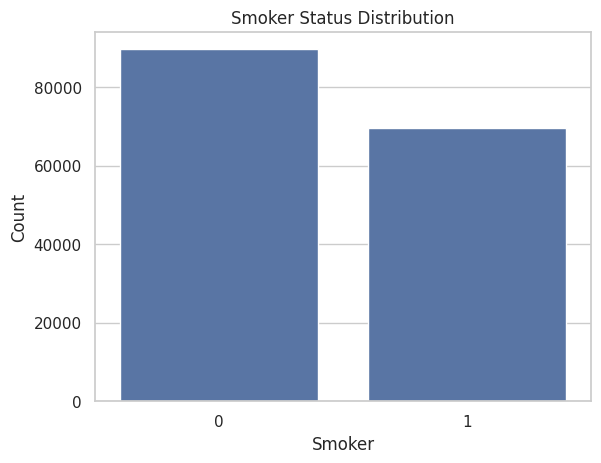

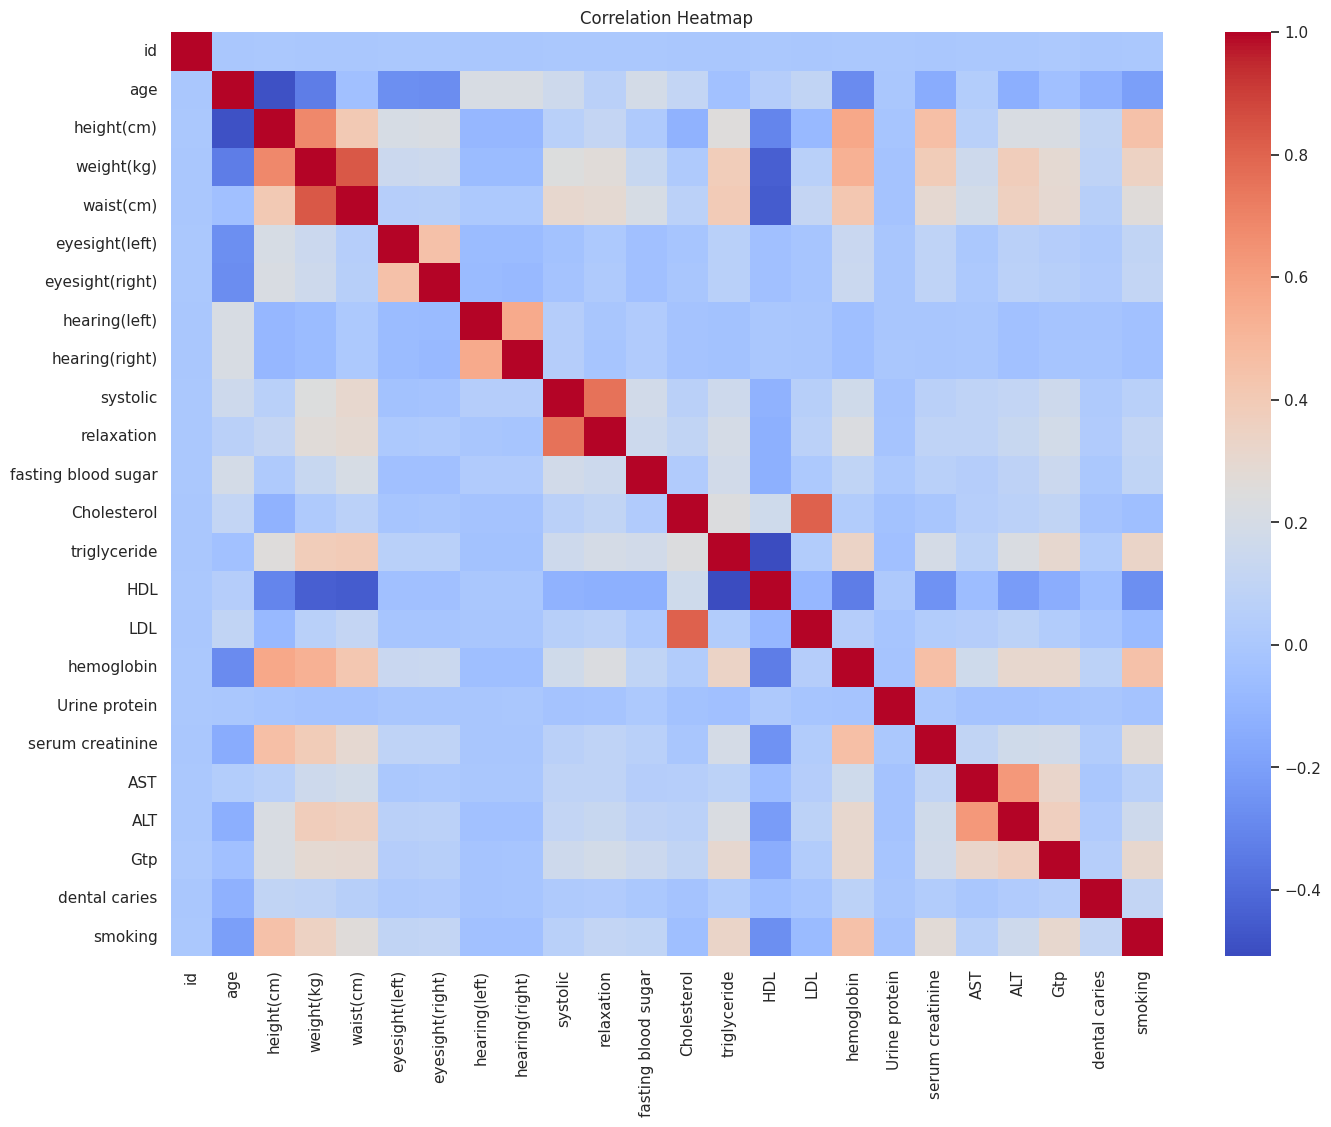

In [79]:
# Distribution of smoking variable
sns.countplot(x='smoking', data=df)
plt.title("Smoker Status Distribution")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Boxplots of Features by Smoking Status

Create boxplots for selected features grouped by smoking status to identify patterns or differences.

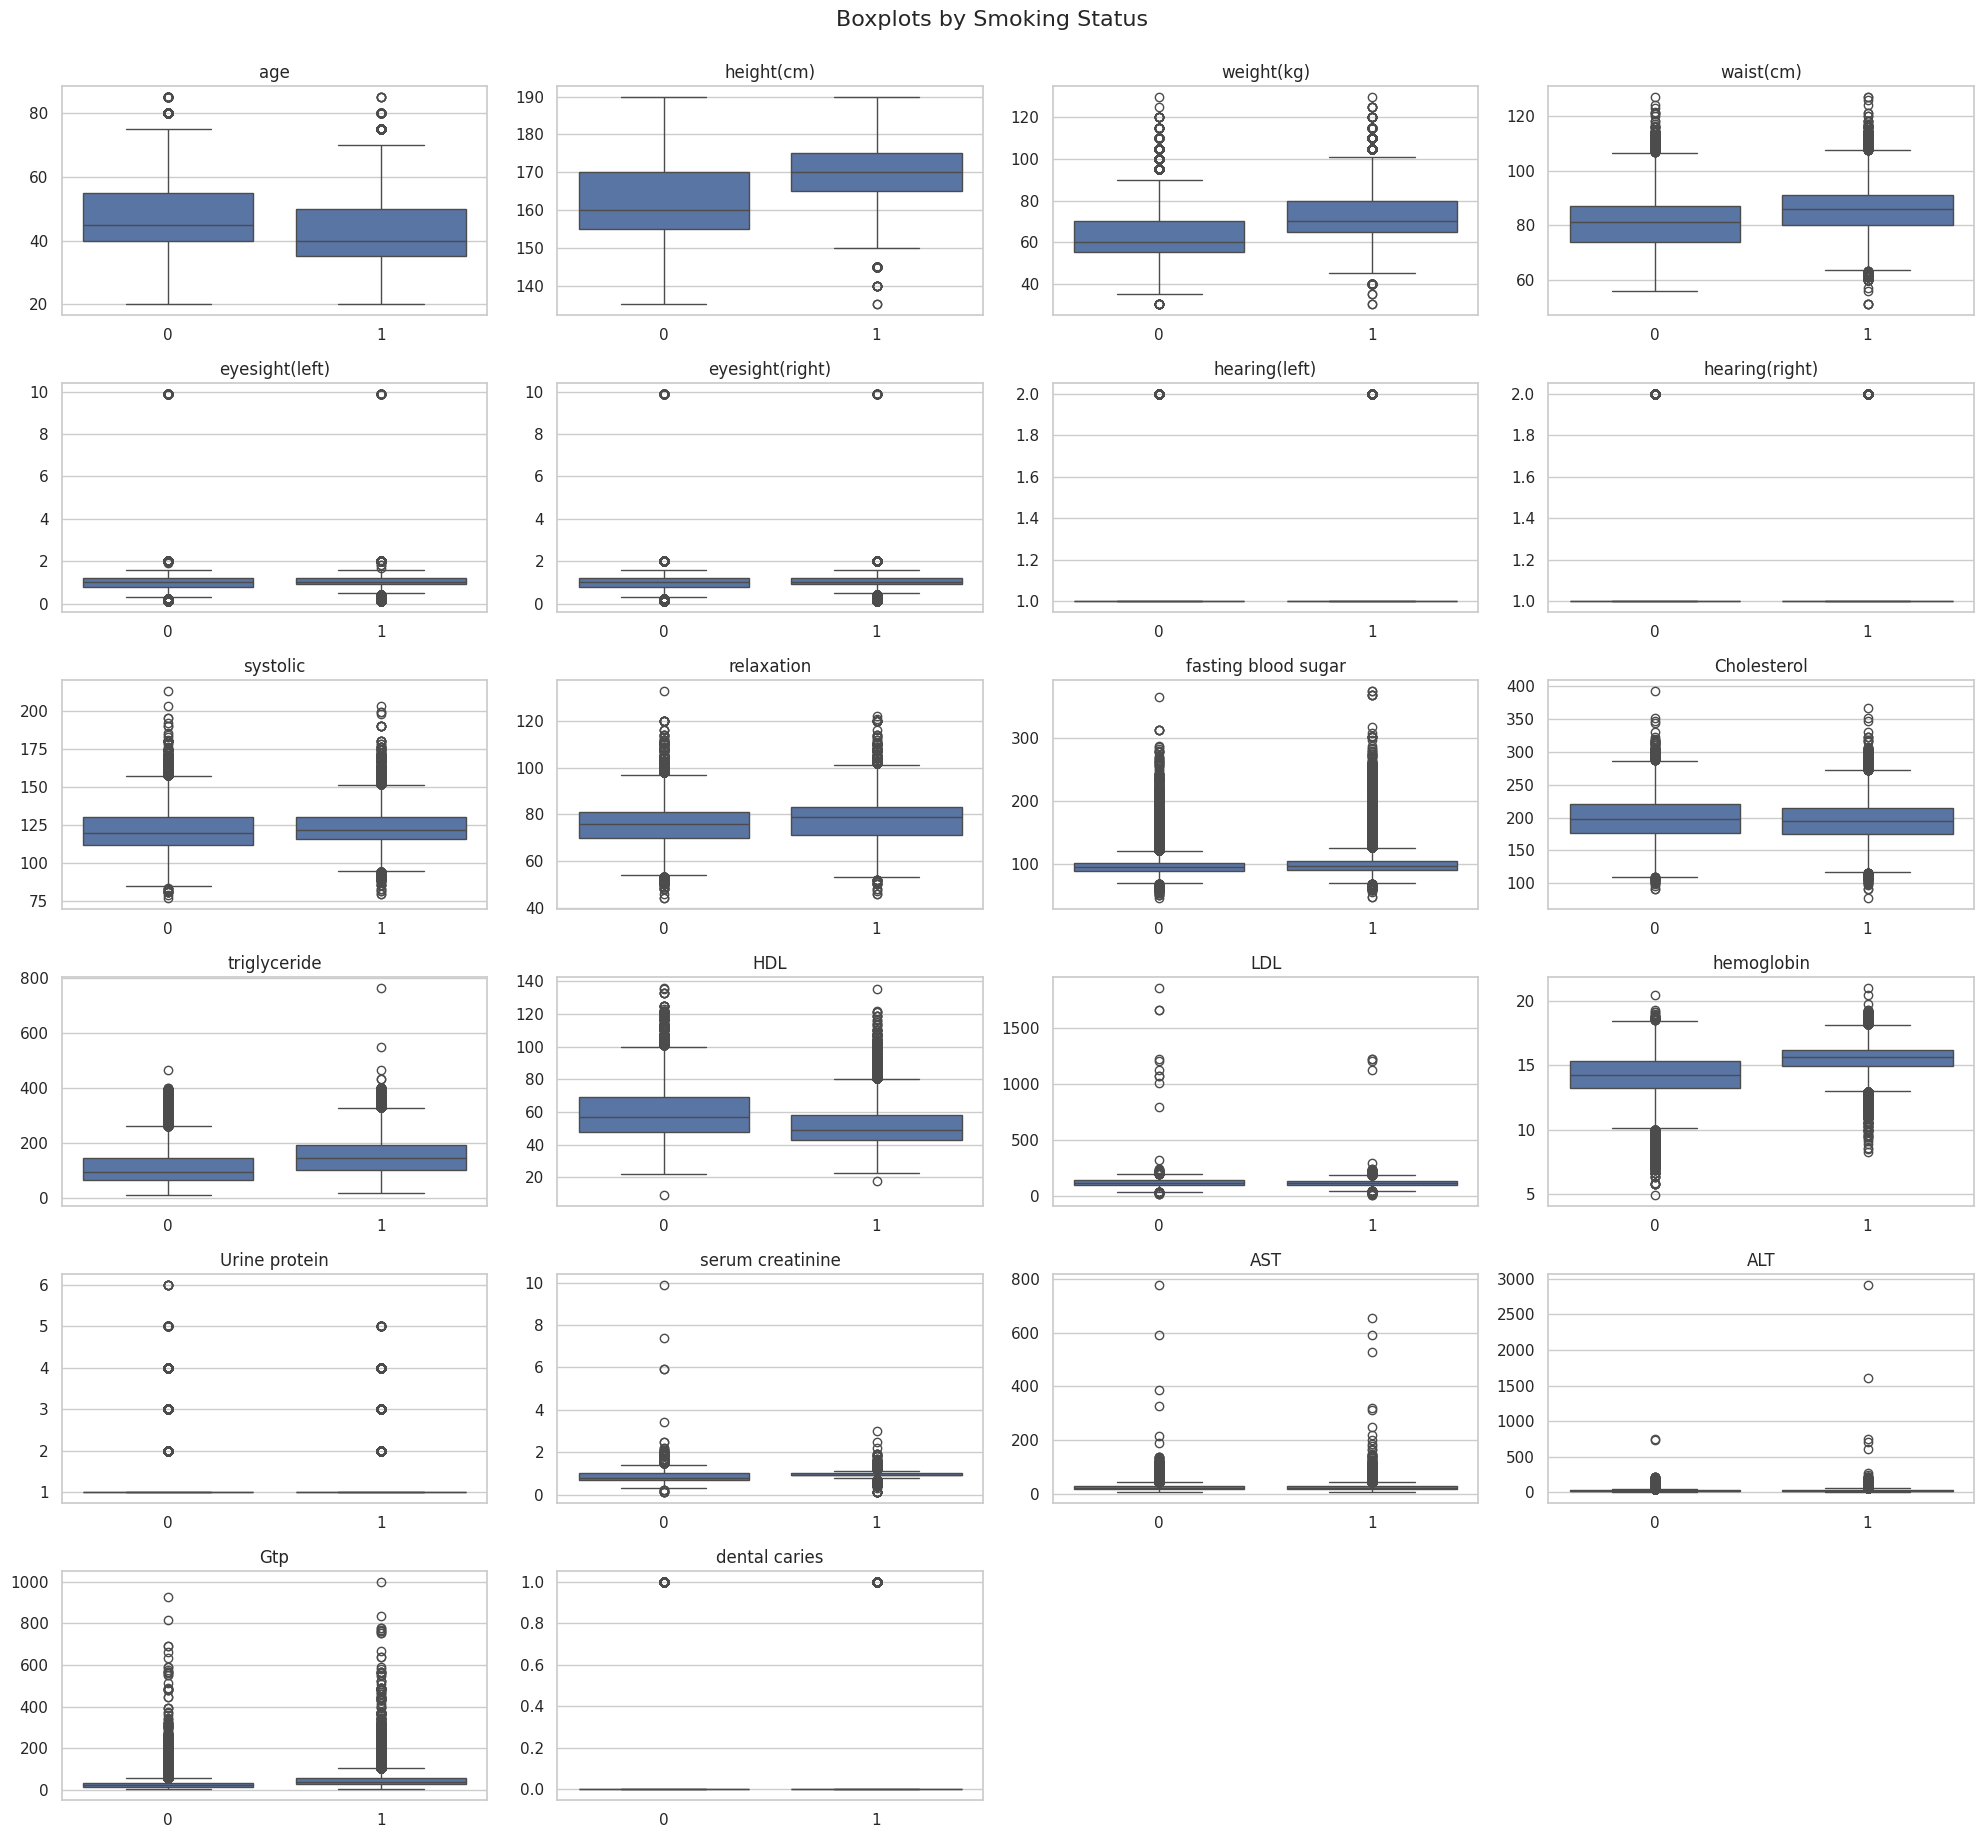

In [80]:
features = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)',
            'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar',
            'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
            'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']

import math

cols = 4  # 3 gráficos por linha
rows = math.ceil(len(features) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 3))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x='smoking', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f"{feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remover eixos vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Boxplots by Smoking Status", fontsize=16, y=1.02)
plt.show()

## Data Cleaning -> Removing Irrelevant Features

Based on the boxplots and visual inspection, some features show little to no difference between smoker and non-smoker groups.  
These features will be removed to simplify the model and avoid noise.
The id column will also be removed, as it serves only as a unique identifier and carries no predictive information.

We drop the following irrelevant features:  
`id`, `Urine protein`, `hearing(left)`and `hearing(right)`.

In [81]:
df = df.drop(columns=['id'])

#correlation_with_target = df.corr(numeric_only=True)['smoking'].drop('smoking')
numeric_df = df.select_dtypes(include=[np.number])
correlation_with_target = numeric_df.corr()['smoking'].drop('smoking')
correlation_sorted = correlation_with_target.abs().sort_values()
correlation_threshold = 0.05
irrelevant_features_corr = correlation_sorted[correlation_sorted < correlation_threshold].index.tolist()

selector = VarianceThreshold(threshold=0.01)
selector.fit(df.select_dtypes(include=[np.number]))
low_variance_features = df.select_dtypes(include=[np.number]).columns[~selector.get_support()].tolist()

# ANOVA F-test 
X = df.select_dtypes(include=[np.number]).drop(columns='smoking')
y = df['smoking']
f_values, p_values = f_classif(X, y)
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_values,
    'p-Value': p_values
}).sort_values('p-Value')
insignificant_features = anova_results[anova_results['p-Value'] > 0.05]['Feature'].tolist()

final_irrelevant_features = list(set(irrelevant_features_corr + low_variance_features + insignificant_features))
print(f"Features consideradas irrelevantes estatisticamente ({len(final_irrelevant_features)}):\n", final_irrelevant_features)

df = df.drop(columns=final_irrelevant_features)
print("\nDataFrame atualizado com features relevantes apenas:")
print(df.columns)

Features consideradas irrelevantes estatisticamente (3):
 ['Urine protein', 'hearing(left)', 'hearing(right)']

DataFrame atualizado com features relevantes apenas:
Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')


## Data Cleaning -> Removing Outliers (IQR Method)

Based on the visual inspection above, we remove outliers from selected numeric features using the Interquartile Range (IQR) method.

In [82]:
numeric_features = df.select_dtypes(include=[np.number]).columns.drop('smoking').tolist()

print("Features numéricas a processar com IQR:", numeric_features)

for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    before = df.shape[0]
    df = df[(df[feature] >= Q1 - 1.5 * IQR) & (df[feature] <= Q3 + 1.5 * IQR)]
    after = df.shape[0]
    print(f"{feature}: removed {before - after} outliers")


Features numéricas a processar com IQR: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']
age: removed 682 outliers
height(cm): removed 439 outliers
weight(kg): removed 2270 outliers
waist(cm): removed 292 outliers
eyesight(left): removed 2225 outliers
eyesight(right): removed 1826 outliers
systolic: removed 1443 outliers
relaxation: removed 661 outliers
fasting blood sugar: removed 7410 outliers
Cholesterol: removed 292 outliers
triglyceride: removed 2572 outliers
HDL: removed 1560 outliers
LDL: removed 182 outliers
hemoglobin: removed 1332 outliers
serum creatinine: removed 4922 outliers
AST: removed 4823 outliers
ALT: removed 4519 outliers
Gtp: removed 6677 outliers
dental caries: removed 22610 outliers


# Data Splitting
Separate the dataset into features (X) and target variable (y).

In [83]:
X = df.drop(columns=['smoking'])  # features
y = df['smoking']  # target variable

# Feature Scaling

Normalize the feature data using standardization (mean=0, std=1) to improve model performance.

In [84]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split

Split the data into training and testing sets with stratification to maintain class distribution.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Parameter Tuning

In [88]:
dt_params = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='f1', n_jobs=-1)
dt_grid.fit(X_train, y_train)
print("Best Decision Tree params:", dt_grid.best_params_)
print("Best Decision Tree F1 score (CV):", dt_grid.best_score_)

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("Best Random Forest params:", rf_grid.best_params_)
print("Best Random Forest F1 score (CV):", rf_grid.best_score_)

knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='f1', n_jobs=-1)
knn_grid.fit(X_train, y_train)
print("Best KNN params:", knn_grid.best_params_)
print("Best KNN F1 score (CV):", knn_grid.best_score_)

svc_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}
svc_grid = GridSearchCV(LinearSVC(random_state=42, max_iter=5000), svc_params, cv=5, scoring='f1', n_jobs=-1)
svc_grid.fit(X_train, y_train)
print("Best LinearSVC params:", svc_grid.best_params_)
print("Best LinearSVC F1 score (CV):", svc_grid.best_score_)

Best Decision Tree params: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}
Best Decision Tree F1 score (CV): 0.7050451289546881
Best Random Forest params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest F1 score (CV): 0.7262571972369332
Best KNN params: {'n_neighbors': 9, 'weights': 'uniform'}
Best KNN F1 score (CV): 0.6793016057668222
Best LinearSVC params: {'C': 0.001, 'class_weight': 'balanced'}
Best LinearSVC F1 score (CV): 0.7243538887491195


## Train and Evaluate Machine Learning Models

We will implement and compare three supervised learning algorithms:

- Decision Tree
- k-Nearest Neighbors (k-NN)
- Support Vector Machine (SVM)

For each model, we will:

- Train on the training data
- Predict on the test data
- Evaluate performance using accuracy, precision, recall, F1-score, and confusion matrix


Training and evaluating Decision Tree...
Training and evaluating Random Forest...
Training and evaluating k-Nearest Neighbors...
Training and evaluating Linear Support Vector Machine...

Summary Table of Metrics:
                               Accuracy Precision    Recall  F1 Score  \
Decision Tree                  0.752918  0.656048  0.763165  0.705564   
Random Forest                  0.769185  0.675142   0.78058  0.724042   
k-Nearest Neighbors            0.737949  0.649813  0.703678  0.675674   
Linear Support Vector Machine  0.750378  0.636393  0.831708  0.721058   

                              Training Time (s) Testing Time (s)  
Decision Tree                          0.206064         0.001252  
Random Forest                          9.912036         0.182397  
k-Nearest Neighbors                    0.002667         0.571207  
Linear Support Vector Machine          0.119885         0.000666  


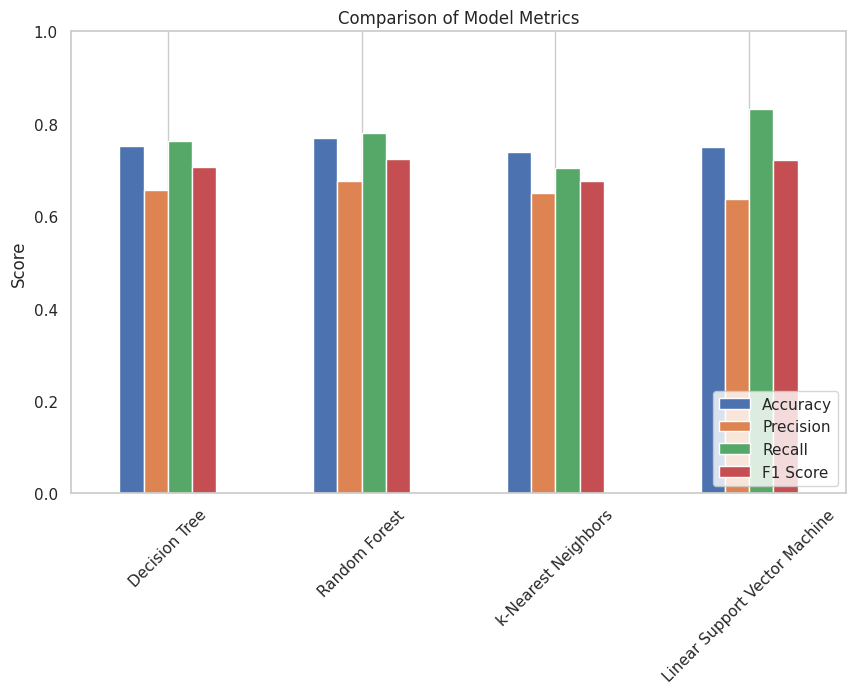

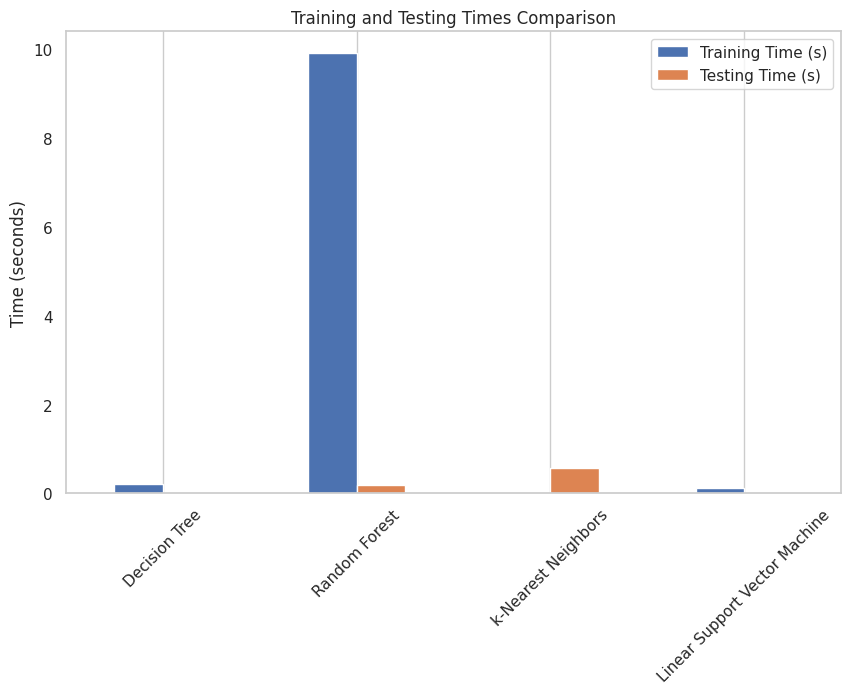

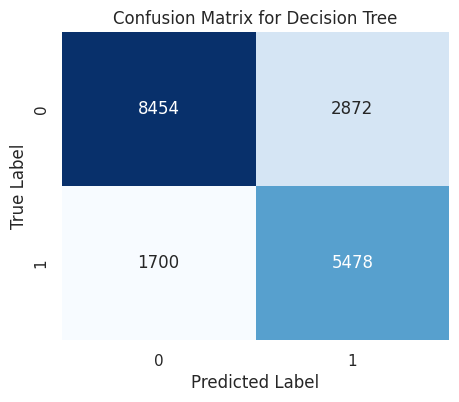

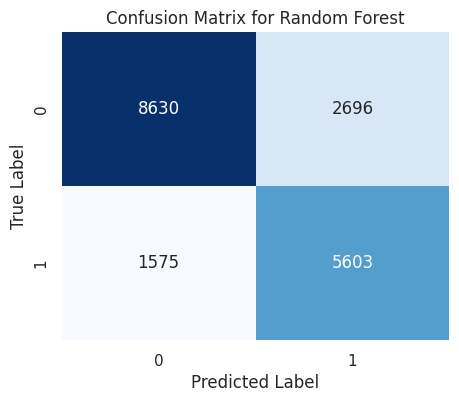

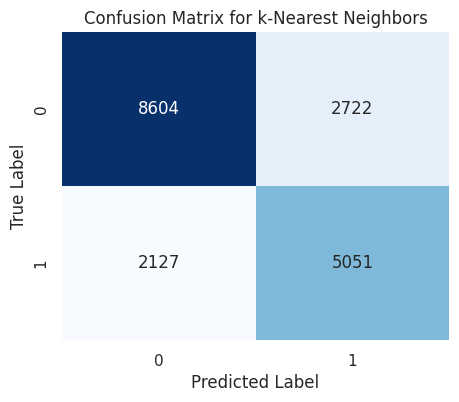

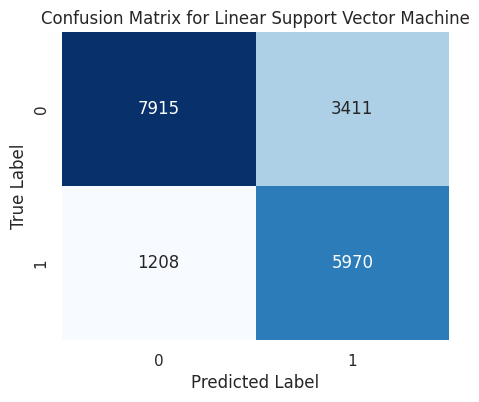

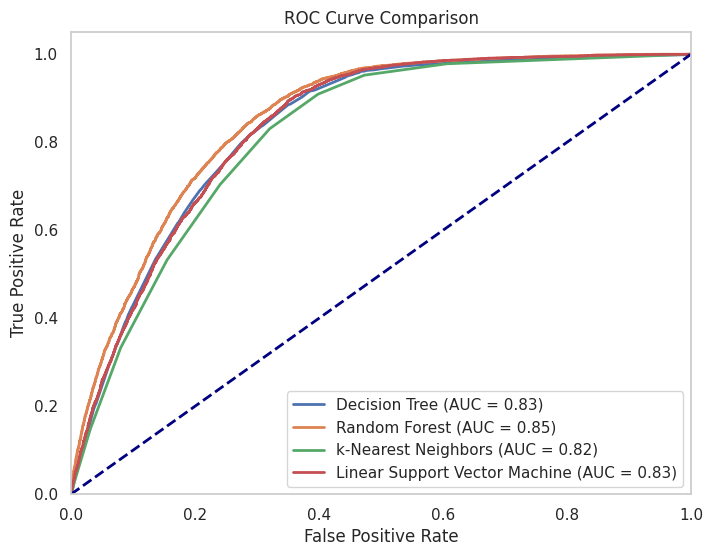

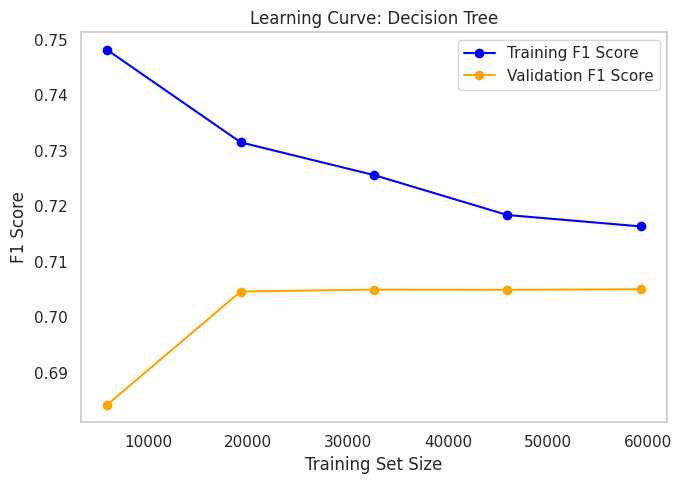

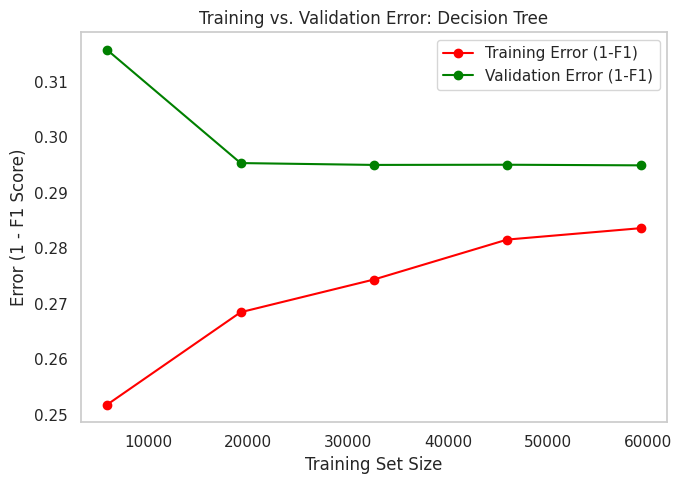

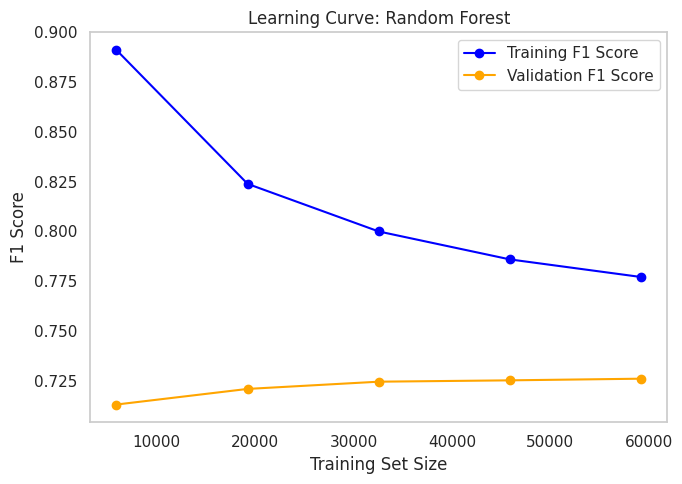

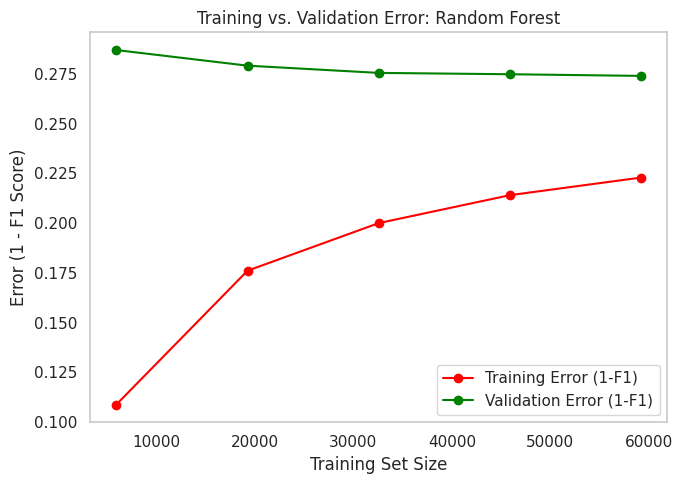

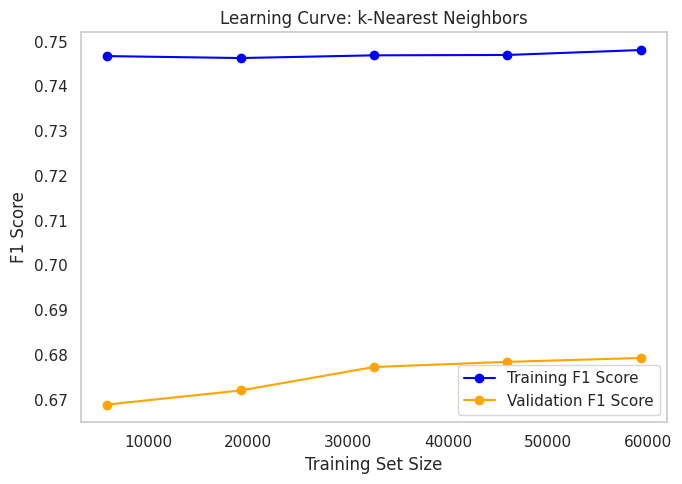

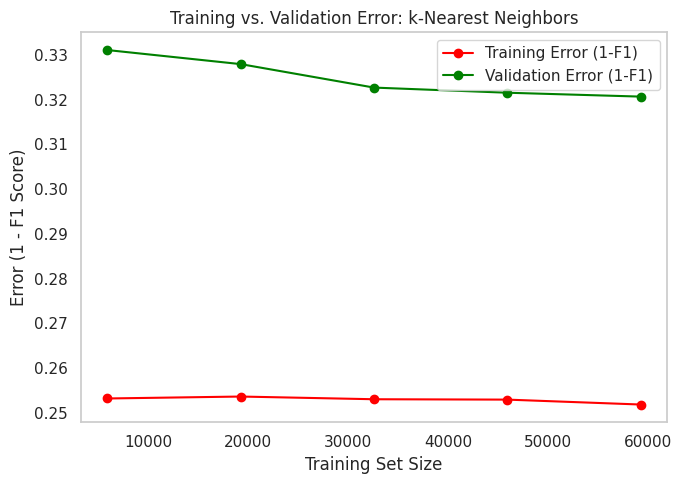

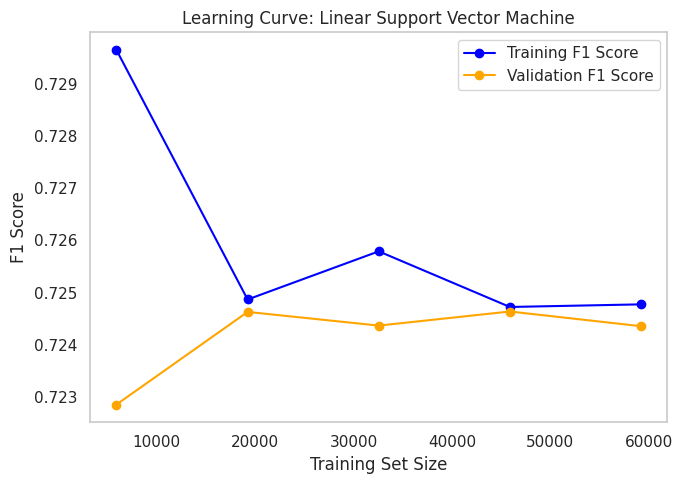

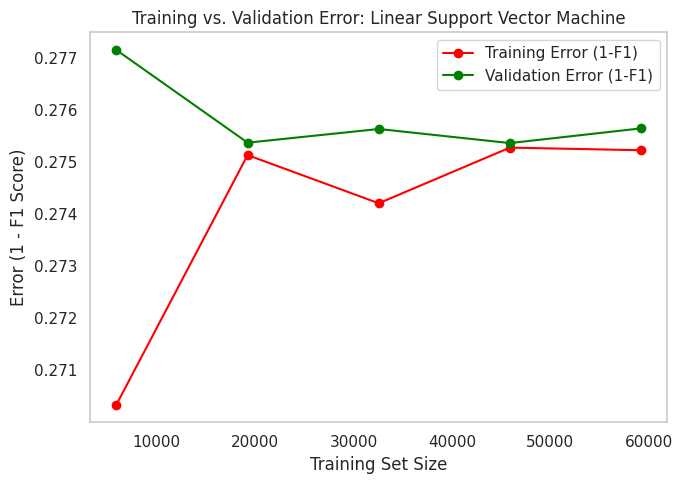

In [89]:
models = {
    'Decision Tree': dt_grid.best_estimator_,
    'Random Forest': rf_grid.best_estimator_,
    'k-Nearest Neighbors': knn_grid.best_estimator_,
    'Linear Support Vector Machine': svc_grid.best_estimator_
}

results = {}

for name, model in models.items():
    print(f"Training and evaluating {name}...")
    
    # training time
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    training_time = end_train - start_train

    # testing time
    start_test = time.time()
    y_pred = model.predict(X_test)
    end_test = time.time()
    testing_time = end_test - start_test

    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm,
        'Training Time (s)': training_time,
        'Testing Time (s)': testing_time,
        'Train Predictions': model.predict(X_train), 
        'Test Predictions': y_pred   
    }
    


for name, res in results.items():
    train_df = pd.DataFrame(X_train).copy()
    train_df['True Label'] = y_train.astype(int).reset_index(drop=True)
    train_df['Predicted Label'] = pd.Series(res['Train Predictions']).astype(int).reset_index(drop=True)
    train_df.to_csv(f'original/predictions/{name}_train_predictions.csv', index=False)

    test_df = pd.DataFrame(X_test).copy()
    test_df['Predicted Label'] = pd.Series(res['Test Predictions']).astype(int).reset_index(drop=True)
    test_df.to_csv(f'original/predictions/{name}_test_predictions.csv', index=False)

#--------
metrics_df = pd.DataFrame(results).T[
    ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time (s)', 'Testing Time (s)']
]

print("\nSummary Table of Metrics:")
print(metrics_df)

#----------------
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

metrics_df[metrics_to_plot].plot(kind='bar', figsize=(10,6))
plt.title('Comparison of Model Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

# time
times_df = metrics_df[['Training Time (s)', 'Testing Time (s)']].copy()

times_df.plot(kind='bar', figsize=(10,6))
plt.title('Training and Testing Times Comparison')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()

# confusion matrices
for name, res in results.items():
    cm = res['Confusion Matrix']
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# ROC Curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Learning Curves and Error Plots 
train_sizes = np.linspace(0.1, 1.0, 5)
for name, model in models.items():
    plt.figure(figsize=(7, 5))
    train_sizes_abs, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='f1', train_sizes=train_sizes, n_jobs=-1, shuffle=True, random_state=42
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    plt.plot(train_sizes_abs, train_scores_mean, 'o-', color='blue', label='Training F1 Score')
    plt.plot(train_sizes_abs, val_scores_mean, 'o-', color='orange', label='Validation F1 Score')
    plt.title(f'Learning Curve: {name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('F1 Score')
    plt.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Error plot
    plt.figure(figsize=(7, 5))
    train_error = 1 - train_scores_mean
    val_error = 1 - val_scores_mean
    plt.plot(train_sizes_abs, train_error, 'o-', color='red', label='Training Error (1-F1)')
    plt.plot(train_sizes_abs, val_error, 'o-', color='green', label='Validation Error (1-F1)')
    plt.title(f'Training vs. Validation Error: {name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Error (1 - F1 Score)')
    plt.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()